# Практическая работа №6

**Анализ данных о покупках** 

- Шаг 1. Импортировать необходимые библиотеки.
- Шаг 2. Получить данные из файла
https://github.com/OlesiaAngel/DataAnalitics/raw/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/dataset6_pr.csv
- Шаг 3. Выполнить кластерный анализ с помощью алгоритма k-means.
- Шаг 4. Постройть диаграмму рассеивания - scatter plot.
- Шаг 5. Сформулировать выводы.
- Шаг 6. Опубликовать файл расширения ipynb на платформе Odin.

Датасет - информация о покупках клиентов:

- **Товар** - уникальный номер товара
- **Количество** - количество купленных товаров
- **Сумма** - объем продаж этого товара
- **Процент_продаж** - доля продаж этого товара от общего объема продаж
- **Процент_колво** -  доля продаж этого товара от общего количества проданных товаров
- **Сумма_продаж**- комулятивная сумма по объему продаж
- **Сумма_колво** - комулятивная сумма по количеству проданных товаров

***Шаг 1.Импорт библиотек***

In [1]:
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import scipy.sparse as sparse
import numpy as np

%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')#Ваш код здесь

***Шаг 2. Получаю данные из файла***

In [2]:
df = pd.read_csv("https://github.com/OlesiaAngel/DataAnalitics/raw/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/dataset6_pr.csv") #загружаю файл
df.shape   #смотрю размерность

(5293, 8)

In [3]:
df.head(15) #изучаю датасет-1

,Unnamed: 0,Товар,Количество,Сумма,Процент_продаж,Процент_колво,Сумма_продаж,Сумма_колво
0,4744,4944.0,725,5092324.27,1.033086,1.537776,3.832430,1.537776
1,4714,4911.0,580,1823693.31,0.369975,1.230221,13.936921,2.767997
2,3366,3487.0,435,4566229.85,0.926357,0.922666,4.758786,3.690663
3,417,434.0,430,1747247.86,0.354466,0.912060,14.291388,4.602723
4,2542,2635.0,425,1211674.74,0.245814,0.901455,24.168217,5.504179
5,4860,5064.0,423,2394352.38,0.485745,0.897213,8.220382,6.401391
6,4816,5019.0,399,3056367.99,0.620049,0.846307,6.150799,7.247699
7,4742,4942.0,373,1114453.77,0.226091,0.791159,26.543743,8.038858
8,2617,2715.0,303,1920850.19,0.389685,0.642684,12.040243,8.681542
9,4845,5049.0,299,827954.00,0.167968,0.634200,33.731641,9.315743


In [4]:
df.info() #изучаю датасет-2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5293 non-null   int64  
 1   Товар           5293 non-null   float64
 2   Количество      5293 non-null   int64  
 3   Сумма           5293 non-null   float64
 4   Процент_продаж  5293 non-null   float64
 5   Процент_колво   5293 non-null   float64
 6   Сумма_продаж    5293 non-null   float64
 7   Сумма_колво     5293 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 330.9 KB


In [5]:
df.drop(columns = ['Unnamed: 0'],axis = 1, inplace=True) # удаляю непонятную колонку Unnamed
df.head(5)

,Товар,Количество,Сумма,Процент_продаж,Процент_колво,Сумма_продаж,Сумма_колво
0,4944.0,725,5092324.27,1.033086,1.537776,3.832430,1.537776
1,4911.0,580,1823693.31,0.369975,1.230221,13.936921,2.767997
2,3487.0,435,4566229.85,0.926357,0.922666,4.758786,3.690663
3,434.0,430,1747247.86,0.354466,0.912060,14.291388,4.602723
4,2635.0,425,1211674.74,0.245814,0.901455,24.168217,5.504179


***Шаг 3. Выполняю кластерный анализ с помощью алгоритма k-means.***

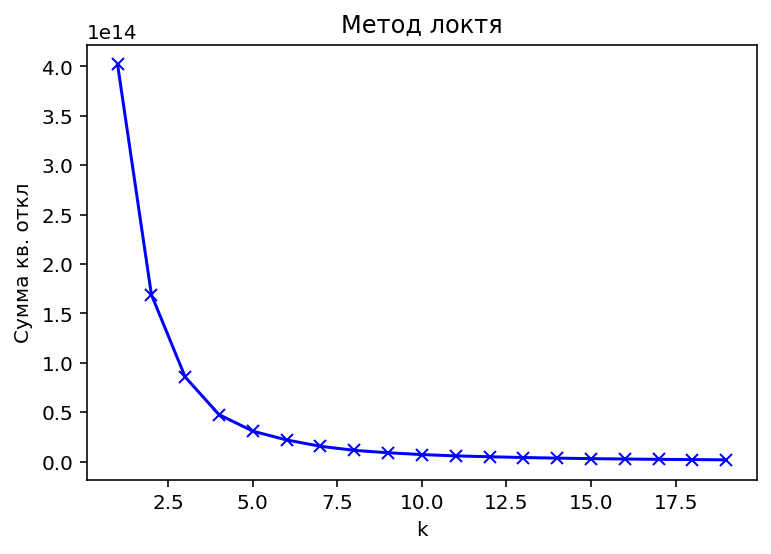

In [6]:
Sum_of_squared_distances = [] #использую метод локтя, чтобы вычислить оптимальное кол-во кластеров
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Сумма кв. откл')
plt.title('Метод локтя')
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 3, random_state=0).fit(df) # кластерный анализ
                                                        
predict = kmeans.predict(df)      
df['Кластер'] = predict           # добавляю колонку с кластерами в таблицу
df.head(15)

,Товар,Количество,Сумма,Процент_продаж,Процент_колво,Сумма_продаж,Сумма_колво,Кластер
0,4944.0,725,5092324.27,1.033086,1.537776,3.832430,1.537776,1
1,4911.0,580,1823693.31,0.369975,1.230221,13.936921,2.767997,2
2,3487.0,435,4566229.85,0.926357,0.922666,4.758786,3.690663,1
3,434.0,430,1747247.86,0.354466,0.912060,14.291388,4.602723,2
4,2635.0,425,1211674.74,0.245814,0.901455,24.168217,5.504179,2
5,5064.0,423,2394352.38,0.485745,0.897213,8.220382,6.401391,2
6,5019.0,399,3056367.99,0.620049,0.846307,6.150799,7.247699,2
7,4942.0,373,1114453.77,0.226091,0.791159,26.543743,8.038858,2
8,2715.0,303,1920850.19,0.389685,0.642684,12.040243,8.681542,2
9,5049.0,299,827954.00,0.167968,0.634200,33.731641,9.315743,2


In [8]:
df["Кластер"].value_counts() # Смотрю распределение кластеров (97% / 3% / 1%)

0    5152
2     136
1       5
Name: Кластер, dtype: int64

In [9]:
from sklearn.feature_selection import SelectKBest # нахожу важные признаки, которые влияют на целевой признак "кластер"
from sklearn.feature_selection import chi2

X = df
y = df.iloc[:, -1]

bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score'))  

            Specs         Score
2           Сумма  3.399127e+09
1      Количество  1.989658e+05
0           Товар  3.271741e+04
7         Кластер  1.021346e+04
5    Сумма_продаж  6.518358e+03
6     Сумма_колво  4.760668e+03
3  Процент_продаж  6.895850e+02
4   Процент_колво  4.220205e+02


***Шаг 4. Постройть диаграмму рассеивания - scatter plot.***

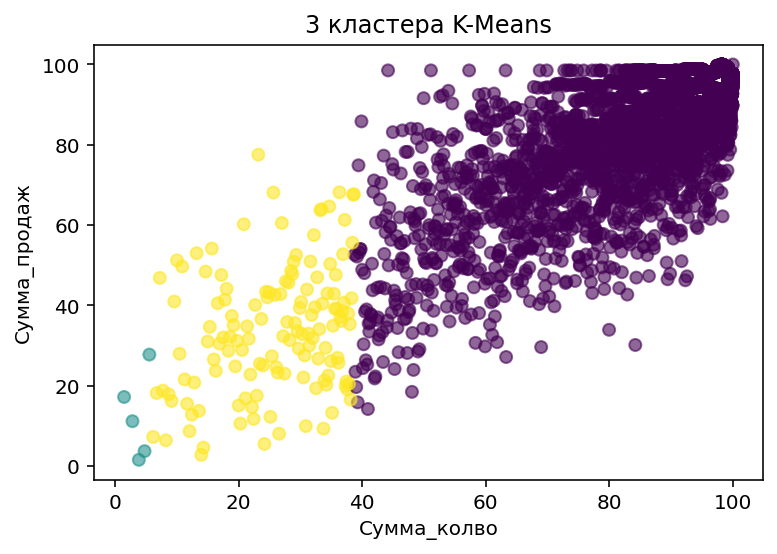

In [10]:
plt.scatter(df['Сумма_продаж'], df["Сумма_колво"], c = kmeans.labels_, cmap='viridis', alpha = 0.6)
plt.xlabel('Сумма_колво')
plt.ylabel('Сумма_продаж')
plt.title('3 кластера K-Means')
plt.show()

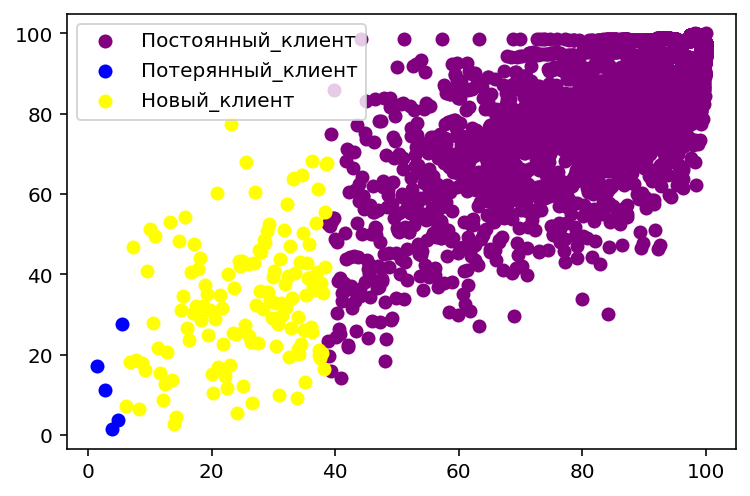

In [11]:
plt.scatter(df[df.Кластер == 0]['Сумма_продаж'],
            df[df.Кластер == 0]['Сумма_колво'],
            color='purple', label='Постоянный_клиент')

plt.scatter(df[df.Кластер == 1]['Сумма_продаж'],
            df[df.Кластер == 1]['Сумма_колво'],
            color='blue', label='Потерянный_клиент')

plt.scatter(df[df.Кластер == 2]['Сумма_продаж'],
            df[df.Кластер == 2]['Сумма_колво'],
            color='yellow', label='Новый_клиент')

plt.legend(loc='upper left')

## Вывод